In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px    ### plot the data on World map

In [3]:
path = "https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv"
data = pd.read_csv(path)
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
35770,NaN,Sao Tome and Principe,0.186360,6.613081,6/4/20,485,12,68,afro
35771,NaN,Yemen,15.552727,48.516388,6/4/20,453,103,0,emro
35772,NaN,Comoros,-11.645500,43.333300,6/4/20,132,2,55,afro
35773,NaN,Tajikistan,38.861034,71.276093,6/4/20,4289,48,0,euro
35774,NaN,Lesotho,-29.609988,28.233608,6/4/20,4,0,2,afro


In [0]:
data.info()

In [0]:
data = pd.read_csv(path,parse_dates=['Date'])
data.info()

In [0]:
data.tail()

In [0]:
data.drop(['Province/State'],axis=1,inplace=True);
data.head()

In [8]:
data.rename(columns={"Country/Region":"Country"},inplace=True)
data.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,emro
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,euro
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,afro
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,euro
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,afro


In [0]:
#### Add the Active Cases
data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths']
data.tail()

In [0]:
#### Print the cases the latest date
top = data[data['Date']==data['Date'].max()]
top.head()

In [19]:
top[top['Country']=="China"]

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region,Active
35559,China,31.8257,117.2264,2020-06-04,991,6,985,wpro,0
35560,China,40.1824,116.4142,2020-06-04,594,9,583,wpro,2
35561,China,30.0572,107.8740,2020-06-04,579,6,573,wpro,0
35562,China,26.0789,117.9874,2020-06-04,358,1,356,wpro,1
35563,China,37.8099,101.0583,2020-06-04,139,2,137,wpro,0
35564,China,23.3417,113.4244,2020-06-04,1598,8,1584,wpro,6
35565,China,23.8298,108.7881,2020-06-04,254,2,252,wpro,0
35566,China,26.8154,106.8748,2020-06-04,147,2,145,wpro,0
35567,China,19.1959,109.7453,2020-06-04,169,6,163,wpro,0
35568,China,39.5490,116.1306,2020-06-04,328,6,322,wpro,0


In [20]:
world = top.groupby('Country')["Confirmed","Deaths","Recovered","Active"].sum()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Confirmed,Deaths,Recovered,Active
Country,,,,
Afghanistan,18054,300,1585,16169
Albania,1197,33,898,266
Algeria,9831,681,6297,2853
Andorra,852,51,738,63
Angola,86,4,18,64


In [21]:
world.reset_index(inplace=True)
world.head()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,18054,300,1585,16169
1,Albania,1197,33,898,266
2,Algeria,9831,681,6297,2853
3,Andorra,852,51,738,63
4,Angola,86,4,18,64


In [63]:
##### Plot data on world map
world_map = px.choropleth(world,locations='Country',locationmode='country names',
                          color_continuous_scale='Peach',color='Active',
                          title="Countries With Active Cases",range_color=[1,200000])
world_map.show()
plt.savefig('map.jpg')

<Figure size 432x288 with 0 Axes>

In [28]:
### Plot diffrent cases vs Date Graph
total_confirmed_cases = data.groupby("Date")["Confirmed"].sum().reset_index()
total_confirmed_cases.tail()

,Date,Confirmed
130,2020-05-31,6166940
131,2020-06-01,6265845
132,2020-06-02,6378230
133,2020-06-03,6508628
134,2020-06-04,6632978


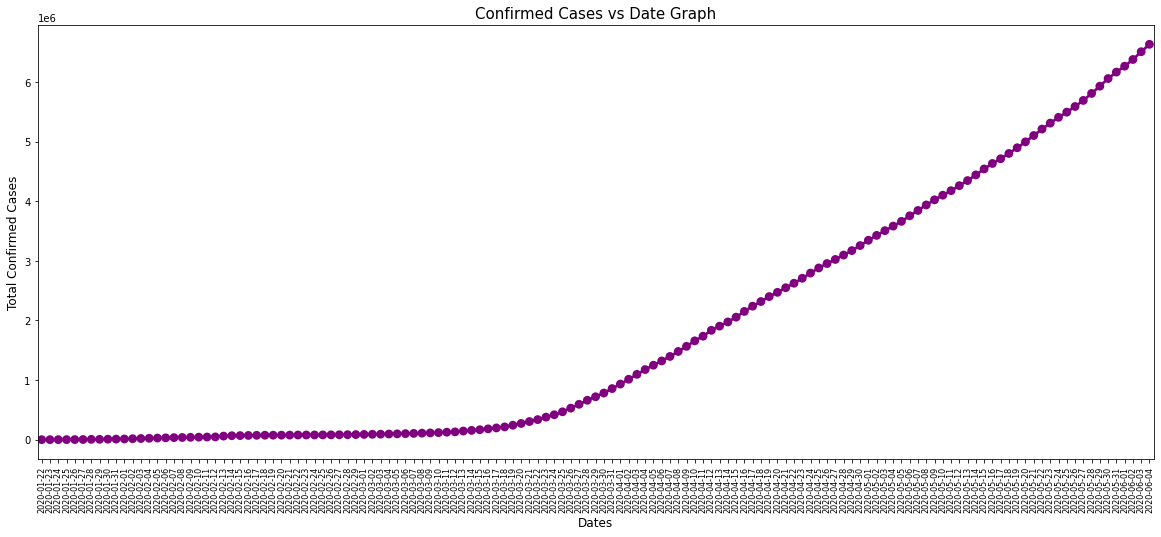

In [62]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90,fontsize=8)
sns.pointplot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed']
              ,color="purple")
plt.title("Confirmed Cases vs Date Graph",fontsize=15)
plt.ylabel("Total Confirmed Cases",fontsize=12)
plt.xlabel("Dates",fontsize=12)
plt.show()

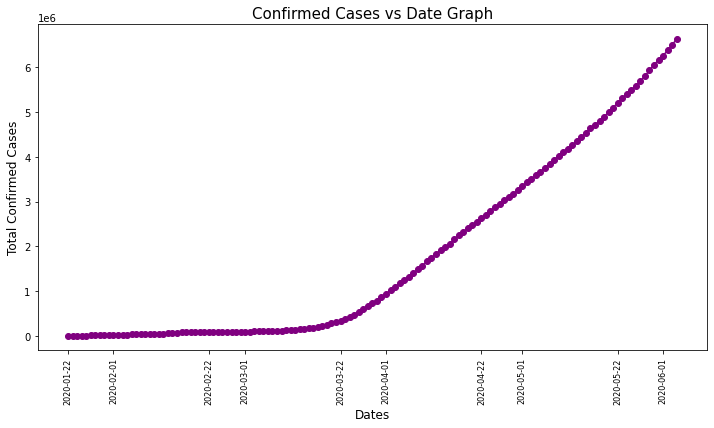

In [46]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90,fontsize=8)
plt.plot(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed']
              ,color="purple")
plt.scatter(total_confirmed_cases['Date'].dt.date,total_confirmed_cases['Confirmed']
              ,color="purple")
plt.title("Confirmed Cases vs Date Graph",fontsize=15)
plt.ylabel("Total Confirmed Cases",fontsize=12)
plt.xlabel("Dates",fontsize=12)
plt.show()

In [0]:
#### Top 20 Countries Having Most No.of Confirmed/Recovered Cases
top_cases = top.groupby("Country")['Confirmed','Recovered'].sum()
top_cases.head()

In [0]:
top_cases = top_cases.sort_values("Confirmed",ascending=False).reset_index()
top_cases.head()

In [0]:
top_20 = top_cases.head(20)
top_20

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(top_20['Confirmed'],top_20['Country'],label="Confirmed",color='red')
plt.legend(loc=4,fontsize=15)
plt.show()

In [0]:
plt.figure(figsize=(12,6))
sns.barplot(top_20['Confirmed'],top_20['Country'],label="Confirmed",color='red')
sns.barplot(top_20['Recovered'],top_20['Country'],label="Recovered",color='green')
plt.legend(loc=4,fontsize=15)
plt.show()

In [61]:
#### Filter Country Wise
india = data[data['Country']=='India']
india.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region,Active
131,India,21.0,78.0,2020-01-22,0,0,0,searo,0
396,India,21.0,78.0,2020-01-23,0,0,0,searo,0
661,India,21.0,78.0,2020-01-24,0,0,0,searo,0
926,India,21.0,78.0,2020-01-25,0,0,0,searo,0
1191,India,21.0,78.0,2020-01-26,0,0,0,searo,0


In [60]:
china = data[data['Country']=='China']
china.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,WHO Region,Active
49,China,31.8257,117.2264,2020-01-22,1,0,0,wpro,1
50,China,40.1824,116.4142,2020-01-22,14,0,0,wpro,14
51,China,30.0572,107.8740,2020-01-22,6,0,0,wpro,6
52,China,26.0789,117.9874,2020-01-22,1,0,0,wpro,1
53,China,37.8099,101.0583,2020-01-22,0,0,0,wpro,0
